# $g_{rms}$ Calculator

### Definitions

In [89]:
# Includes

import numpy as np
import matplotlib.pyplot as plt
import tabulate as tab

$g_{rms} = \sqrt{a_{PSD}}$

$m = \frac{log(y_2) - log(y_1)}{log(x_2) - log(x_1)}$

$b = \frac{y_1}{x_1^m}$

$y = b x^m$

$a = ∫b x^m dx = \frac{b}{m+1}x^{m+1}$

$g_{rms} = \sqrt{∑a_i}$

In [90]:
# Functions

def loglogSlope(x1, y1, x2, y2):
    return (np.log(y1) - np.log(y2)) / (np.log(x1) - np.log(x2))

def loglogIntercept(x1, y1, m):
    return y1 / (x1 ** m)

def integral(x1, x2, m, b):
    return b / (m + 1) * x2 ** (m + 1) - b / (m + 1) * x1 ** (m + 1)

def get_area(f, PSD):
    a = []

    for index in range(len(f) - 1):
        m = loglogSlope(f[index], PSD[index], f[index + 1], PSD[index + 1])
        b = loglogIntercept(f[index], PSD[index], m)
        a.append(integral(f[index], f[index + 1], m, b))

    return a

def grms(a):
    return round(np.sqrt(np.sum(a)), 2)

In [91]:
# Plotting

def psdPlot(f, psd, g_rms, label, width = 0, height = 0):
    f_max = np.max(f)

    plt.plot(f, psd, label=label)
    if width > 0 and height > 0:
        plt.rcParams["figure.figsize"] = (width, height)
    plt.yscale("log")
    plt.xscale("log")
    plt.grid(True, which="both")
    plt.xlim(1, f_max)
    plt.xlabel("frequency [Hz]")
    plt.ylabel(r"PSD [$g^2$/Hz]")
    ax = plt.gca()
    plt.xticks([1, 10, 100, 1000, 3000], [1, 10, 100, 1000, 3000])
    plt.yticks([0.001, 0.01, 0.1, 1, 10], [0.001, 0.01, 0.1, 1, 10])
    plt.title(label + r" ($g_{rms}$ = " + f"{g_rms} g)")
    # plt.legend()
    plt.show()

In [92]:
# Table

def printTable(f, PSD, style):
    data = np.vstack((f, PSD))

    table = tab.tabulate(data.T, headers=["f [Hz]", "PSD [g^2/Hz]"], tablefmt=style) 

    return table

### Params

In [93]:
plot_label = 'Random Vibration QT'
plot_width = 10
plot_height = 5
table_style = "html" # use "html" for table output / "rst" for simple output / "latex" for latex output

### Input

In [94]:
f = [20, 50, 150, 300, 1000, 2000] # Hz
PSD = [0.1, 3, 3, 0.16, 0.16, 0.0388] # g^2/Hz

### Calculation

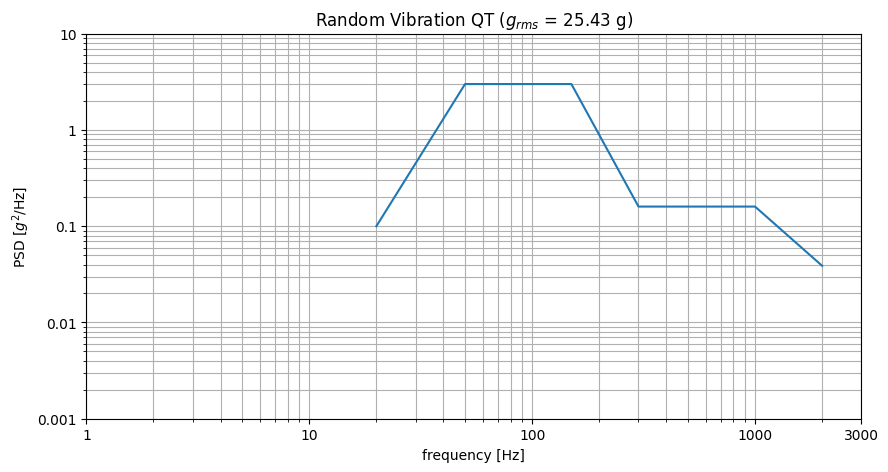

g_rms = 25.43 g


f [Hz],PSD [g^2/Hz]
20,0.1
50,3
150,3
300,0.16
1000,0.16
2000,0.0388


In [95]:
g_rms = grms(get_area(f, PSD))

psdPlot(f, PSD, g_rms, plot_label, plot_width, plot_height)
print(f"g_rms = {g_rms} g")
table = printTable(f, PSD, table_style)
table